In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from json import load

In [3]:
root = "embryo018"
datapath = Path().cwd().parent / "data" / "interim" / "confocal"
plotpath = datapath / root / "plots"
spots_df = pd.read_csv(datapath / root / f"{root}_spots.csv")
with open(datapath / root / f"{root}_metadata.json") as f:
    metadata = load(f)

In [4]:
division_times = np.array(metadata["division_times"])
division_times

array([ 12,  62, 124, 200, 316])

In [9]:
group = spots_df.sort_values(by="FRAME").groupby("tracklet_id")
cols = {
    "start_time": group["time"].min(),
    "end_time": group["time"].max(),
    "start_frame": group["FRAME"].min(),
    "end_frame": group["FRAME"].max(),
    "length": group["time"].max() - group["time"].min(),
    "source_spot": group["ID"].first(),
    "sink_spot": group["ID"].last(),
    "mean_ap_position": group["ap_position"].mean(),
    "source_ap_position": group["ap_position"].first(),
    "sink_ap_position": group["ap_position"].last(),
    "track_id": group["track_id"].first(),
    "mean_edge_distance": group["um_from_edge"].mean(),
}
tracklets = pd.DataFrame(cols)
tracklets["track_n_tracklets"] = tracklets["track_id"].map(
    tracklets["track_id"].value_counts()
)
# map each tracklet start time to the nearest division time
tracklets["cycle"] = tracklets["start_frame"].apply(
    lambda x: np.argmin(np.abs(division_times - x)) + 10
)

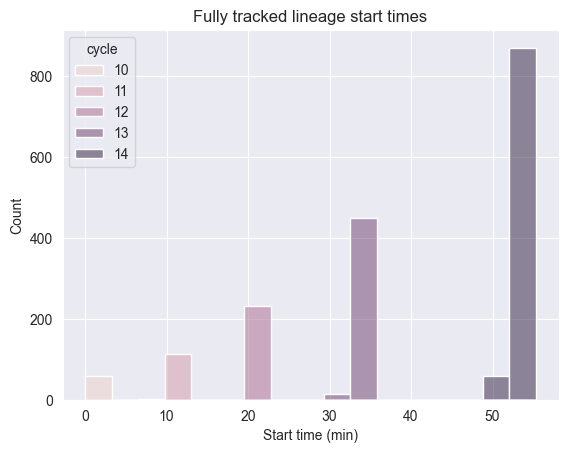

In [10]:
sns.histplot(tracklets[tracklets["track_n_tracklets"]==31], x="start_time", hue="cycle")
plt.xlabel("Start time (min)")
plt.title("Fully tracked lineage start times")
plt.savefig(plotpath / "tracklet_start_times.png")

<Axes: xlabel='length', ylabel='mean_edge_distance'>

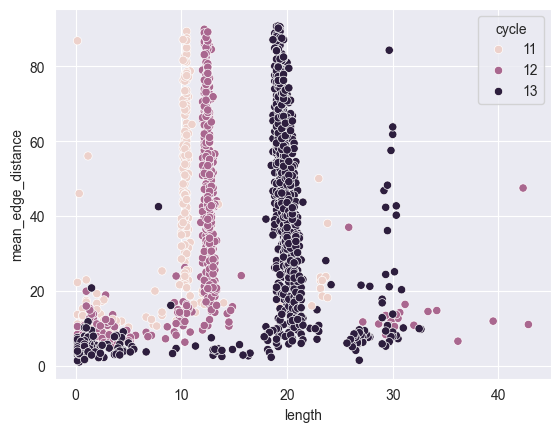

In [13]:
sns.scatterplot(data=tracklets[tracklets["cycle"].isin([11, 12, 13])], x="length", y="mean_edge_distance", hue="cycle")